# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

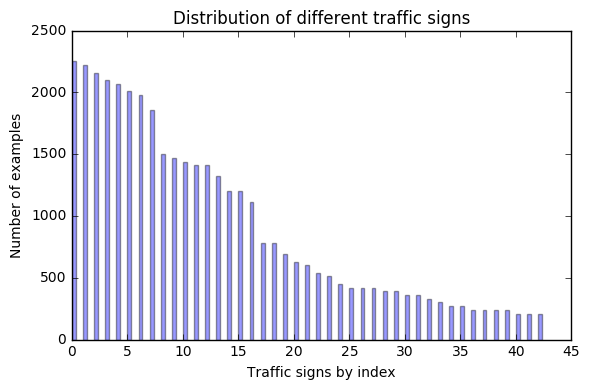

Number of training examples: 39209
Number of testing examples: 12630
Image data shapes for data set:
[[53 54]
 [42 45]
 [48 52]
 ..., 
 [29 29]
 [48 49]
 [32 31]]
Number of classes: 43
Most common traffic sign class 0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
### Replace each question mark with the appropriate value.
import pandas as pd
#Number of training examples
n_train = len(X_train)

#Number of testing examples.
n_test = len(X_test)

#What's the shape of an traffic sign image?
image_shape = test['sizes']

#How many unique classes/labels there are in the dataset.
n_classes = len(set(test['labels']))

#Plot distribution of traffic sign data
d_count = pd.Series(y_train).value_counts().tolist()
n_groups = len(d_count)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
plt.bar(index, d_count, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Number of different traffic signs')
plt.xlabel('Traffic signs by index')
plt.ylabel('Number of examples')
plt.title('Distribution of different traffic signs')
plt.tight_layout()
plt.show()

print("Number of training examples:", n_train)
print("Number of testing examples:", n_test)
print("Image data shapes for data set:")
print(image_shape)
print("Number of classes:", n_classes)
print("Most common traffic sign class", d_count.index(max(d_count)))

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

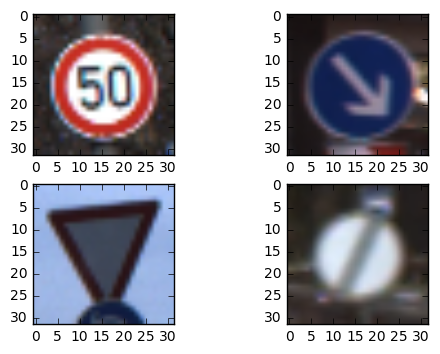

In [3]:
### Data exploration visualization goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
test1 = test['features'][1500]
test2 = test['features'][5]
test3 = test['features'][530]
test4 = test['features'][2500]
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(test1)
axarr[0, 1].imshow(test2)
axarr[1, 0].imshow(test3)
axarr[1, 1].imshow(test4)
plt.show()
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data
###Split into training sets
import numpy as np
import cv2
#Shuffle data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Split data into 1-hold validation (simple k-fold validation)
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state =0)

print("Shape of training data: {}".format(X_train.shape))
print("Shape of validation data: {}".format(X_validation.shape))
print("Shape of testing data:",n_test)
print("Shape of training labels:", y_train.shape)
print("Shape of validation labels:",y_validation.shape)

Shape of training data: (31367, 32, 32, 3)
Shape of validation data: (7842, 32, 32, 3)
Shape of testing data: 12630
Shape of training labels: (31367,)
Shape of validation labels: (7842,)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The image data is then initially converted into YUV and the Y channel globally normalized - resulting in better classification accuracies as shown below. This method was inspired by the paper (Sermanet, P., & LeCun, Y. (2011, July). Traffic sign recognition with multi-scale convolutional networks. 2011).

In [5]:
### Preprocess the data and add to training data
import cv2
import random as r

from sklearn.preprocessing import normalize

def prep(img):
    #1. Convert to YUV color scheme
    #2. Normalize and return the Y channel
    #convert RGB to BGR
    img = img[...,::-1]
    #Convert to YUV
    Y_channel = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    #Return normalized Y channel, i.e. we are interested in color intensities strongest along edges
    return normalize(Y_channel[:,:,0],  axis=1, norm='l1')

def addNoise(img, sign_label, test_y):
    '''
    Samples are randomly perturbed to augment the current data set:
    Should the sample be less than 2250, the most common traffic light present in the data set, then add random
    '''
    cols, rows = img.shape[:2]
    img = prep(img)

    #1. position ([-2,2] pixels), 
    ###########################
    img_t1, img_t2 = r.randint(-2, 2), r.randint(-2, 2)
    M = np.float32([[1,0,img_t1],[0,1,img_t2]])
    trans_img = cv2.warpAffine(img,M,(cols,rows))
    test_y.append(sign_label)


    #2. Rotationally ([-15,+15] degrees)
    ##########################
    img_r = r.randint(-15, 15)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),img_r,1)
    rot_img = cv2.warpAffine(img,M,(cols,rows))
    test_y.append(sign_label)

    #3. Add Y normalized original image back into new array
    test_y.append(sign_label)
      
    return [img, trans_img, rot_img]
#New images added to training set
X_train_g = []
new_y_labels = []

X_validation_g = []
X_test_g = []

#Apply jitter to original images set    
for im in range(0,len(X_train)):    
    X_train_g.extend(addNoise(X_train[im], y_train[im], new_y_labels))

#These validation sets do not need augmentation-are therefore only normalized
for im in range(0,len(X_validation)):
    X_validation_g.append(prep(X_validation[im]))
for im in range(0,len(X_test)):
    X_test_g.append(prep(X_test[im]))

print("Size of training set: ", len((X_test_g)))
print("Size of validation set: ", len((X_validation_g)))
print("Size of augmented training set: ", len((X_train_g)))

/home/kiarie/anaconda/envs/yourNewEnvironment/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


Size of training set:  12630
Size of validation set:  7842
Size of augmented training set:  94101


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**


1. The data is initially split up into 3 classes:

    Original data set ratios: (train:31367,validation:7842,test:12630).
    
    The augmented data set has the ratios: (train: 94101, 7842, 12630)
    
    
2. Additional data is then added to the training set to make the classifier more resilient to image distortion. This made use of randomly perturbing images within ranges specified below
    
    A. Rotation: (-15, 15) degrees
    
    B. Translation: (-2, 2) pixels
    
 

In [6]:
#Check preprocessing effects on random image in dataset and convert lists into numpy arrays
X_train_g =np.asarray(X_train_g).reshape(len(X_train_g), 32, 32, 1)
X_validation_g =np.asarray(X_validation_g).reshape(len(X_validation_g), 32, 32, 1)
X_test_g =np.asarray(X_test_g).reshape(len(X_test_g), 32, 32, 1)

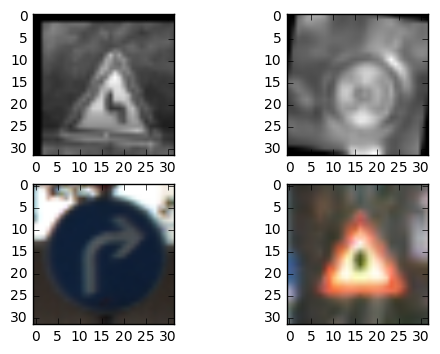

Confirm image tags
Image training label 21
Image training label 1
Image training label 33
Image training label 11


In [7]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(X_train_g[100].reshape(32, 32), cmap = "gray")
axarr[0, 1].imshow(X_train_g[5000].reshape(32, 32), cmap = "gray")
axarr[1, 0].imshow(X_train[1250])
axarr[1, 1].imshow(X_train[250])
plt.show()
%matplotlib inline
print("Confirm image tags")
print("Image training label",new_y_labels[100])
print("Image training label", new_y_labels[5000])
print("Image training label", y_train[1250])
print("Image training label",y_train[250])


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Le-Net 5 implementation taken from https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb**

**LeNet Architecture**

Layer 1: 

        Convolutional.

        The output shape: 28x28x6

        Activation: ReLu.

        Pooling: The output shape: 4x14x6.

Layer 2: 

        Convolutional.
        
        The output shape: 10x10x16.
        
        Activation: ReLu
        
        Pooling: The output shape  5x5x16.

        Flatten

Layer 3: 

        Fully Connected: 120 outputs.
        
        Activation. ReLU

Layer 4: 

        Fully Connected: 84 outputs.
        
        Activation: ReLU
      
Layer 5: 

        Dropout layer
        
        Fully Connected (Logits): 43 outputs.


Return the result of the 2nd fully connected layer.

In [8]:
#Tflow setup
import tensorflow as tf

EPOCHS = 5

BATCH_SIZE = 128

In [9]:
#LeNet 5 architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    drop_layer = tf.nn.dropout(fc2, keep_prob)
    #logits = tf.matmul(fc2, fc3_W) + fc3_b
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:
#Set up placeholders for tf variables
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) # probability to keep units
#Set up training regime variables
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
#Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
#Train model
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train_g)
    
    print("Training...")
    print("Number of epochs: {}".format(EPOCHS))
    print()
    for i in range(EPOCHS):
        X_train_g, new_y_labels = shuffle(X_train_g, new_y_labels)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_g[offset:end], new_y_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation_g, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet-gray')
                                
    print("Model saved")

Training...
Number of epochs: 5

EPOCH 1 ...
Validation Accuracy = 0.757

EPOCH 2 ...
Validation Accuracy = 0.875

EPOCH 3 ...
Validation Accuracy = 0.927

EPOCH 4 ...
Validation Accuracy = 0.943

EPOCH 5 ...
Validation Accuracy = 0.961

Model saved


In [18]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet-gray.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_test_g, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    #Le-net, 5 epochs training set, dropout 0.5, test accuracy, 88.2%
    #Le-net non-augmented data set, dropout 0.5, test accuracy, 88.1%
    #Le-net grayscale, augmented data, Dropout 0.5, test - accuracy 91.1 - 50 epochs%%

Test Accuracy = 0.882


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1. Type of optimizer: ADAM optimizer, learning rate: 0.001
2. Batch Size: 128
3. Epochs: 50

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. The first step involved testing the original Lenet 5 with a (32,32,3) RGB training picture and gradually increasing the number of epochs. Leading to a validation accuracy of roughly 95%.
2. Next up: The above set-up was then augmented with a dropout layer in the final layer: this led to an accuracy boost of 1 resulting in a validation accuracy of 96.4%%
3. Quick research into current traffic sign classifiers led to the paper (Sermanet, P., & LeCun, Y. (2011, July). Traffic sign recognition with multi-scale convolutional networks. 2011). This suggested grayscaling and normalizing the imaages after conversion to the YUV format. This led to a validation boost resulting in a validation accuracy of 98.3% and a testing accuracu of 88.1%.
4. This paper also suggested augmenting the current data set to further increase the training set - jitter was accordingly added to the images resulting in an extended training set that led to validation accuracies of 98.5% and test accuracies of 91.5%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/home/kiarie/anaconda/envs/yourNewEnvironment/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


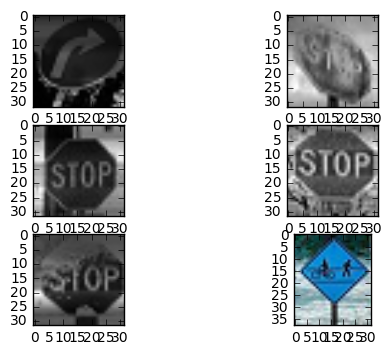

Shape of user picked examples:  (5, 32, 32, 1)
Shape of corresponding labels:  (5,)


In [19]:
### Load the images and plot them here.
#load images
im1 = cv2.imread('new-roadsigns-data/left.jpg')
im2 = cv2.imread('new-roadsigns-data/old_sign.jpg')
im3 = cv2.imread('new-roadsigns-data/stop_sign.jpg')
im4 = cv2.imread('new-roadsigns-data/stopsign_snow.jpg')
im5 = cv2.imread('new-roadsigns-data/stopsign_snow2.jpg')
im6 = cv2.imread('new-roadsigns-data/unknow_sign.jpg')
#downsample images to 32 by 32
images = [im1, im2, im3, im4, im5]
#Corresponding y_labels taken from csv file
y_user_test = np.array([38, 14, 14, 14, 14])
resized = []
for im in images:
    res = cv2.resize(im,(32, 32))
    Y_eq = prep(res)
    resized.append(Y_eq)
#display resultant images
f, axarr = plt.subplots(3, 2)
axarr[0, 0].imshow(resized[0], cmap = "gray")
axarr[0, 1].imshow(resized[1], cmap = "gray")
axarr[1, 0].imshow(resized[2], cmap = "gray")
axarr[1, 1].imshow(resized[3], cmap = "gray")
axarr[2, 0].imshow(resized[4], cmap = "gray")
axarr[2, 1].imshow(im6, cmap = "gray")
plt.show()
%matplotlib inline
resized = np.asarray(resized).reshape(len(resized), 32, 32, 1)
print("Shape of user picked examples: ", resized.shape)
print("Shape of corresponding labels: ", y_user_test.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

**Answer:**

1. One of the stop sign images is old and in brigth lighting conditions.

2. One of the signs is unknown and doesn't belong to the training data set: it is therefore assiged the closest sign: animal-crossing

3. One of the turn right signs is skewed.

4. Two of the stop signs are covered in snow in different poor lighting conditions

In [20]:
### Run the predictions here.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(resized, y_user_test)
    predictions = sess.run(logits, feed_dict={x: resized})
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model did substantially worse on the new test data, with a classification accuracy of 20%. Admittedly I did feed the network badly skewed images in an attempt to see how well it could really perform. I'm fairly confident with better taken images it would perform at par to the test set.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [27]:
### Visualize the softmax probabilities here.
probabilities = tf.placeholder(tf.float32, (None, 43))

with tf.Session() as sess:
    top_k_probs = sess.run(tf.nn.top_k(tf.nn.softmax(probabilities), k=5), feed_dict={probabilities: predictions})
    print("top_k probabilities stored in 'top_k_probs' variable.")

top_k_probabilities = top_k_probs[0]
top_k_predictions = top_k_probs[1]

print()
print("Displaying the first 4 entries...")
print(top_k_probabilities[:4])
print()
print(top_k_predictions[:4])

top_k probabilities stored in 'top_k_probs' variable.

Displaying the first 4 entries...
[[ 0.41780734  0.30043718  0.09833004  0.08579613  0.02812995]
 [ 0.44521853  0.42850152  0.12268289  0.00113552  0.0008856 ]
 [ 0.49027666  0.43252242  0.01989242  0.01978118  0.01339156]
 [ 0.78159142  0.10401499  0.04037253  0.02376536  0.0203141 ]]

[[ 6 32 35 40 28]
 [38 34 35 14 36]
 [14  3  2 38  5]
 [14 34 38 25 36]]


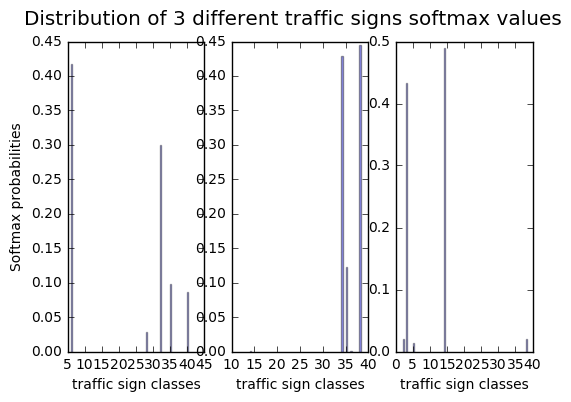

In [54]:
#Plot softmax distribution of traffic sign data

## the data
x = top_k_predictions
y= top_k_probabilities

#Plot settings
fig = plt.figure()
fig.subplots_adjust(hspace=10)
fig.suptitle("Distribution of 3 different traffic signs softmax values", fontsize="x-large")

## left panel
ax1 = fig.add_subplot(131)
ax1.bar(x[0], y[0], bar_width,
                 alpha=opacity)
ax1.set_xlabel('traffic sign classes')
ax1.set_ylabel('Softmax probabilities')
## middle panel
ax2 = fig.add_subplot(132)
ax2.bar(x[1], y[1], bar_width,
                 alpha=opacity,
                color='b')
ax2.set_xlabel('traffic sign classes')
## right panel
ax3 = fig.add_subplot(133)
ax3.bar(x[2], y[2], bar_width,
                 alpha=opacity,
                 color='b')
ax3.set_xlabel('traffic sign classes')

plt.show()

All the softmax values add up to a value of 1. Meaning that each value within the list is representative of the probability of the image being one of the traffic signs classes.

Thereby given the above 3 charts, the following can be inferred:

1. The leftmost chart predicts, class 6 with the highest softmax probability within the distribution, followed closely by 32 and 45. 
2. The middle chart predicts class 34, 38 and 35. Given that 34 and 38 are very close, compared to 35, it can be deduced that the convnet has a high uncertainty as to what class this sign belongs to.
3. The rightmost chart, like the middle chart has a high uncertainty due to the proximity of classes 14 and 3.

Should the convnet have a high confidence that a certain image belongs to a certain class, then the softmax value of the correct class should be significantly higher than the rest of the distribution.